# Tree Survival Prediction Dataset - EDA Preprocessing Pipelines

## Introduction 

### Andrés González Ojeda 31612
This activity consists in performing exporatory data analysis (EDA) followed by building preprocessing pipelines to feed a simple classification model.

The dataset chosen contains information about the passenger 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('../data/Tree_Data.csv')
data

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0,NaN,NaN
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,NaN,NaN
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,NaN,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   str    
 3   Species      2783 non-null   str    
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   str    
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   str    
 8   Adult        2783 non-null   str    
 9   Sterile      2783 non-null   str    
 10  Conspecific  2783 non-null   str    
 11  Myco         2783 non-null   str    
 12  SoilMyco     2783 non-null   str    
 13  PlantDate    2783 non-null   str    
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census       2783

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,2783.0,3914.513834,2253.515063,3.000,1971.000,3932.000,5879.000,7772.000
Plot,2783.0,9.561624,5.203659,1.000,5.000,10.000,14.000,18.000
Light_ISF,2783.0,0.085707,0.025638,0.032,0.066,0.082,0.100,0.161
Core,2783.0,2016.648940,0.477387,2016.000,2016.000,2017.000,2017.000,2017.000
AMF,2783.0,20.553069,12.309587,0.000,13.400,18.000,24.445,100.000
EMF,1283.0,26.476750,16.636890,0.000,13.780,27.720,35.710,87.500
Phenolics,2783.0,1.933105,1.969842,-1.350,0.170,0.750,3.780,6.100
Lignin,2783.0,15.759792,6.779607,2.230,10.355,14.040,21.115,32.770
NSC,2783.0,14.219641,4.298271,4.300,11.605,12.660,17.275,29.450
Census,2783.0,15.282070,9.166555,4.000,7.000,13.000,18.000,33.000


In total we have 24 unique columns, the source describes them as so:
1. No: Unique ID per seedling
2. Plot: Number of the field plot where the seedling was planted in (1-18).
3. Subplot: Subplot within the main plot the seedling was planted in (A-E).
4. Species: Species of the seedling (Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra).
5. Light ISF: Represents the amount of light reaching each subplot at a height of 1m.
6. Light Cat: Categorical light level, which is the range of Light_ISF split into (low, med, high)
7. Core: Year the soil core was removed from the field
8. Soil: Species from which the soil was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species.
9. Adult: Individual tree that soil was taken from.
10. Sterile: Whether the soil is sterelized or not.
11. Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific.
12. Myco: Mycorrhizal type of the seedling species (AMF or EMF).
13. SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF).
14. PlantDate: The date that seedlings were planted in the field pots.
15. AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.
16. EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.
17. Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods).
15. NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods).
16. Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods).
17. Census: The census number at which time the seedling died or was harvested.
18. Time: The number of days at which time the seedling died or was harvested.
19. Event: Used for survival analysis to indicate status of each individual seedling at a given time (above)
0 = harvested or experiment ended
1 = dead
20. Harvest: Indicates whether the seedling was harvested for trait measurement.
21. Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.

For this analysis we will drop the columns 'PassengerID', 'Adult', 'Plot' and 'Subplot' since they are indexes and do not provide useful information for our classification. Since 'Harvest' has only 704/2783 registers and 'EMF' 1283/2783 we'll drop them. We will also drop 'Light_Cat' to avoid redundancy since it's derived from 'Light_ISF'. Finally 'PlantDate', 'Core', 'Census' and 'Time' will also be dropped since in this analysis we don't want to take into account the time component. I consider that if we wanted to take into account the time component to also study climate change we would need a more complex analysis than this.

This leaves us with the following features:
- Species
- Light_ISF
- Soil
- Sterile
- Conspecific
- Myco
- SoilMyco
- AMF
- Phenolics
- Lignin
- NSC

As for the target we picked 'Alive' instead of 'Event' since in this analysis we only care about wether the tree survived or not, we're not analysing the time component.



## Visualisation of numerical features

We'll start with the visual analysis of the numerical features

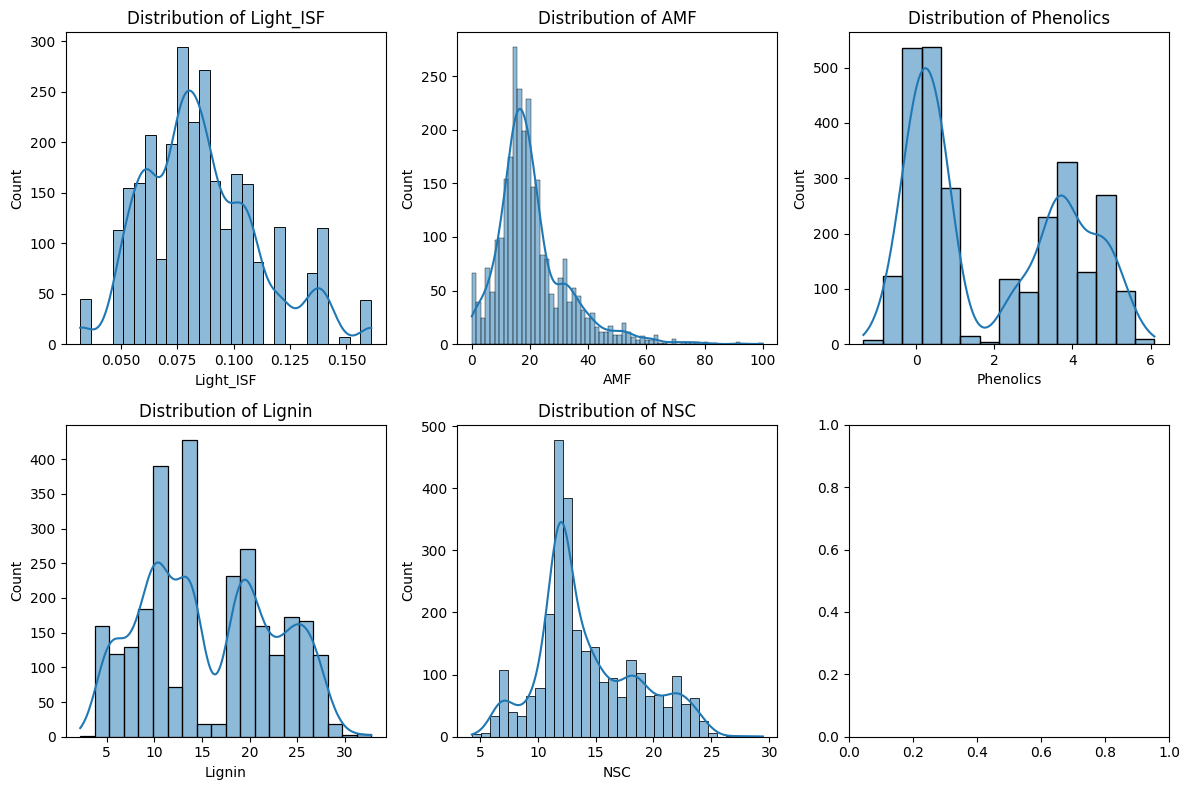

In [5]:
numerical_cols = ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    

fig.tight_layout()


As we can see the distributions for each feature vary but there are similar patterns. 'Light_ISF' and 'NSC' present quite normal distributions. 'AMF' is completely skewed to the left. And 'Lignin' and 'Phenolics' present a bimodal distribution.

We can scale 'AMF' with power transformation to make it easier on certain models. But we should keep the bimodal nature of 'Lignin' and 'Phenolics' since they are important aspects of the data. In future cells we'll decide on a model that isn't affected by non-normal distributions, such as logistic regression or random forest. Depending on the model we'll transform 'AMF'.

## Visualization of categorical features

Using countplots we'll visualize the categorical features

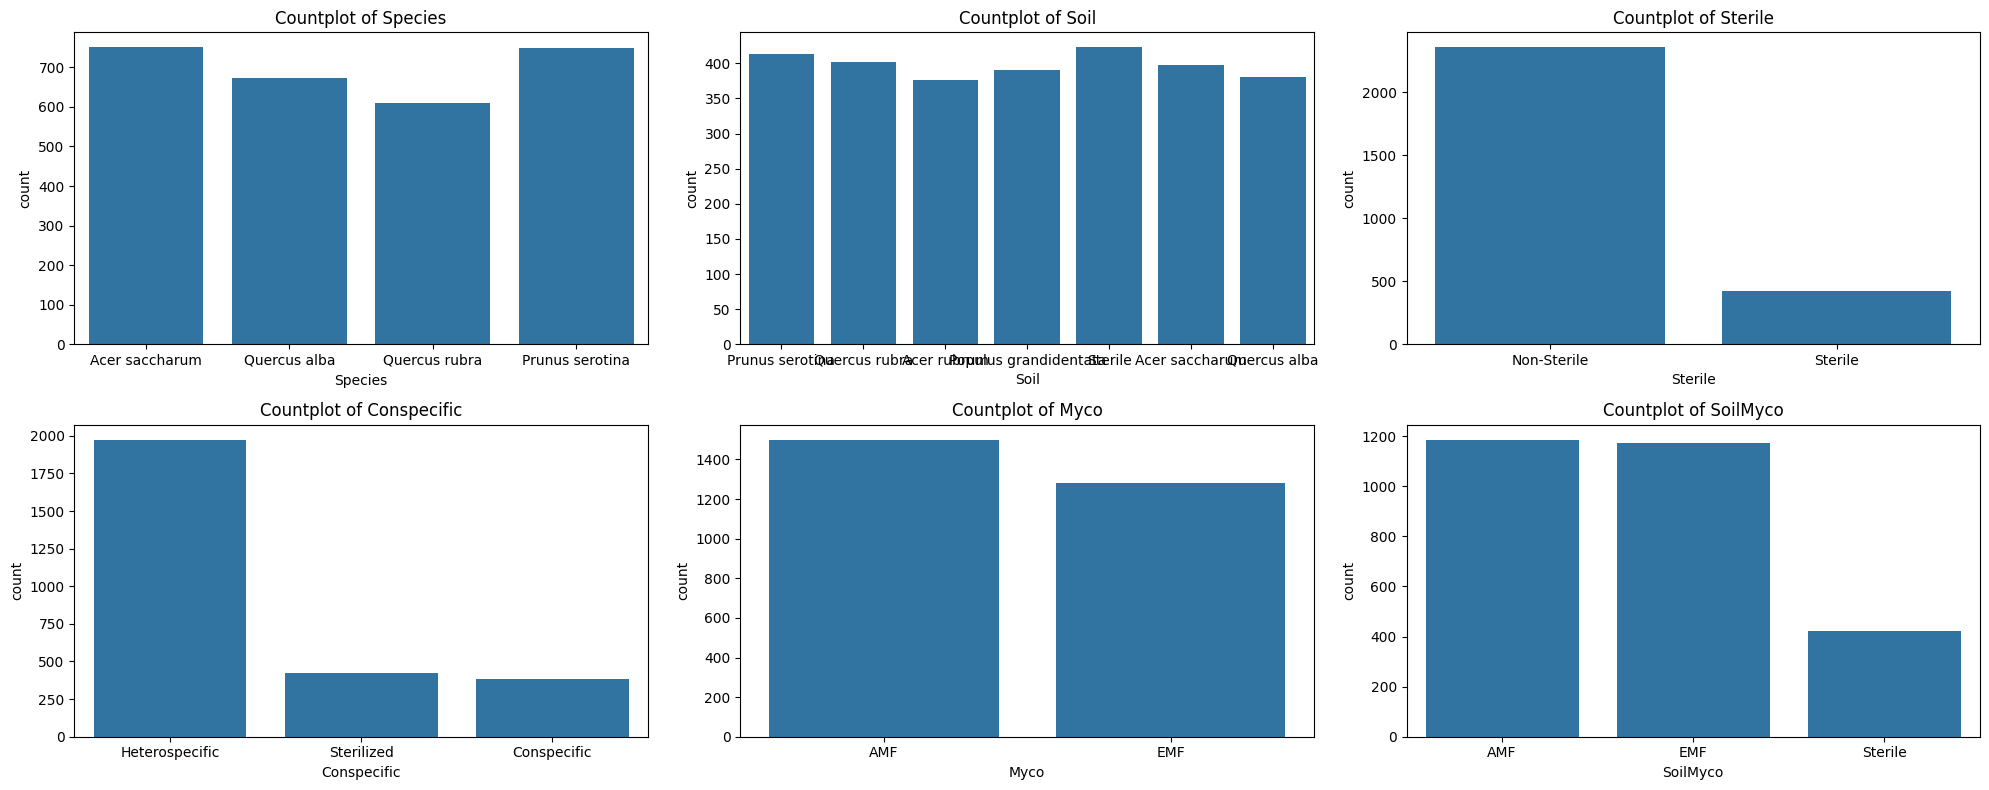

In [6]:
categorical_cols = ['Species', 'Soil', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco']

fig, axs = plt.subplots(2, 3, figsize=(20, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()



We can see that the dataset has a pretty balanced quantity of each species and the soil gathered from the different species. While we have less sterilized samples.

## Target label distribution
Since 'Alive' uses null values to represent dead trees and 'X' to represent alive. We'll convert to 0s and 1s respectevely. (We convert it at this moment so that we can analyse the 'Alive' column, since null values won't show on the plots).

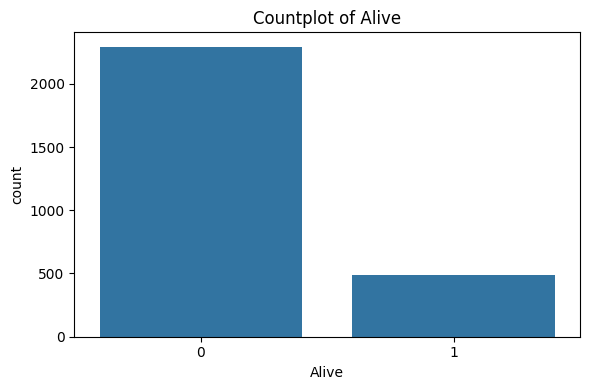

In [7]:
# convert target to binary
data['Alive'] = data['Alive'].apply(lambda x: 1 if x == 'X' else 0)

fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Alive')
plt.title('Countplot of Alive')
plt.tight_layout()



We can see that the dataset includes a large amount of dead trees, only around one fourth of the observations are trees that are alive.

We can also create box plots comparing the target with each of the numerical features.

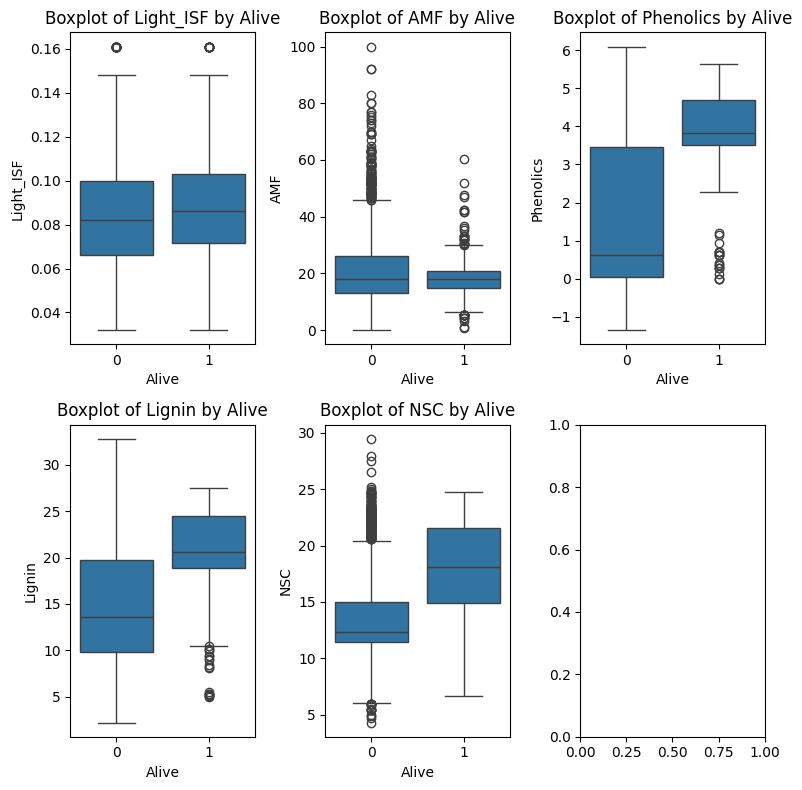

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(8, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.boxplot(data=data, x='Alive', y=col, ax=ax)
    ax.set_title(f'Boxplot of {col} by Alive')

fig.tight_layout()


As the boxplots show, several numerical features show noticeable diferrences between trees that area alive and dead.

'Light_ISF' shows a slight shift where living trees have slightly higher amounts of light available. 

'Phenolics', 'Lignin' and 'NSC' show much higher values on trees that are alive. This indicates that these biological characteristics (chemical structures, structural strenght and energy reserves accordingly).

We can see the value that all these numerical columns provide for tree survival prediction.

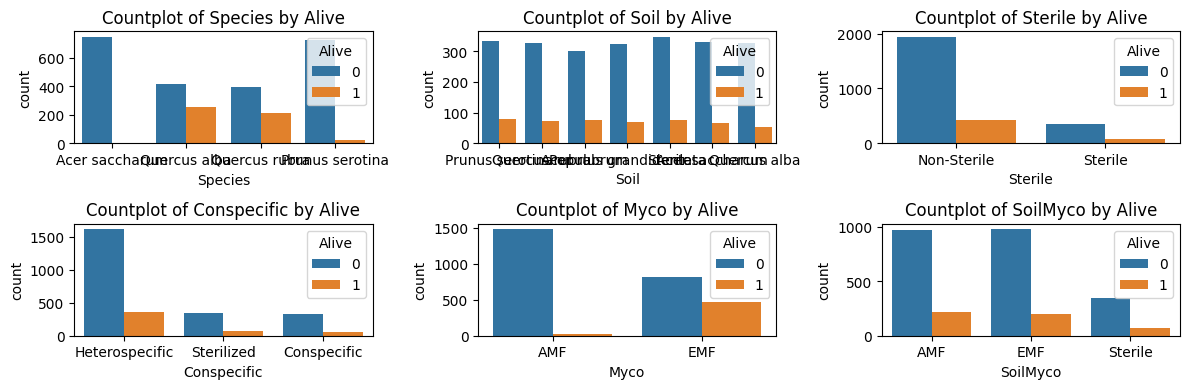

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(12, 4))
for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, hue='Alive', ax=ax)
    ax.set_title(f'Countplot of {col} by Alive')

fig.tight_layout()



Analysing our categorical features. We can see that there isn't a great effect on the different types of soil gathered or the 'Sterile' data. Whereas the species Quercus alba and Quercus rubra seem to have much better survival rates than the other two species.


We can also create a correlation matrix heat map that shows the correlation of all numerical columns including 'Alive'. The categorical columns are not present here since we sould need to convert them to numbers, we'll do this on the preprocessing step.

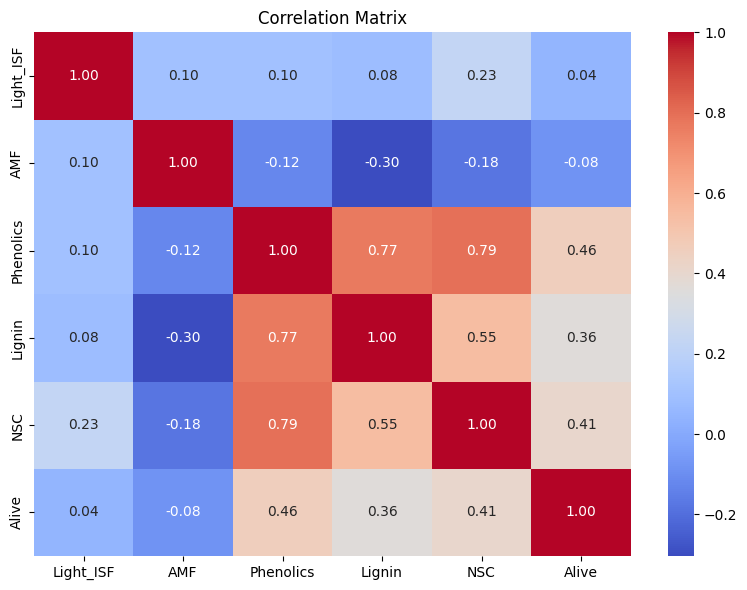

In [10]:
corr_matrix = data[['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Alive']].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

## Handling missing values
It's important to analyse how complete our data is. For this reason we'll plot the null values for each column.

<Axes: >

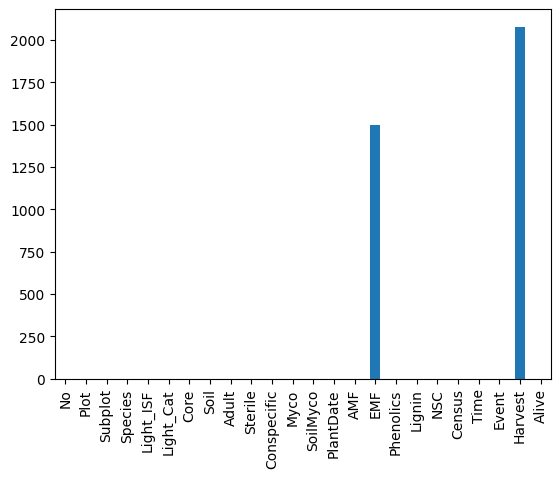

In [11]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

We can also calculate the percentage of missing values.

In [12]:
missing_percent = data.isnull().mean() * 100
missing_percent.sort_values(ascending=False)



Harvest        74.703557
EMF            53.898670
Event           0.035932
No              0.000000
Light_ISF       0.000000
Plot            0.000000
Subplot         0.000000
Species         0.000000
Soil            0.000000
Core            0.000000
Light_Cat       0.000000
Adult           0.000000
Myco            0.000000
SoilMyco        0.000000
Conspecific     0.000000
Sterile         0.000000
AMF             0.000000
PlantDate       0.000000
Phenolics       0.000000
Lignin          0.000000
Census          0.000000
NSC             0.000000
Time            0.000000
Alive           0.000000
dtype: float64

We get three columns with missing registers, we can ignore Event since it's an unused label. As discussed previously we'll drop 'Harvest' and 'EMF' since they're missing a high percentage of their registers.

We could use mean imputation for EMF but since we have less than 50% of the registers we consider it not enough to be useful.

It's important to note that if we hadn't modified 'Alive' we would have a lot of null registers for this column, but since the dataset interprets these null values as dead trees ther'es no missing information here.

## Preprocessing pipelines

Now we can create our pipelines for preprocessing using a ColumnTransformer. Our target is already converted so we don't have to worry about it. For our categorical features we'll use a OneHotEncoder since the order between them does not matter. For the numerical features we will use standard scaling.

Note that we're not normalizing the data since we want to keep the bimodal nature of some of the features.

In [13]:
preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), ['Species', 'Soil', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco']),
            ('num', make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC']),
        ],
        remainder='passthrough', # Pass through any remaining columns without changes
    )
)

Then we'll asign our numerical and categorical features and our target. We'll use a 80-20 train test split as it's standard practice

In [14]:
x = data[numerical_cols + categorical_cols] # Only select relevant columns
y = data['Alive'] # Target column

# Split the dataset into training and testing sets
# stratify=y ensures that the class distribution is preserved in both sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

We'll verify the train test split by plotting it.

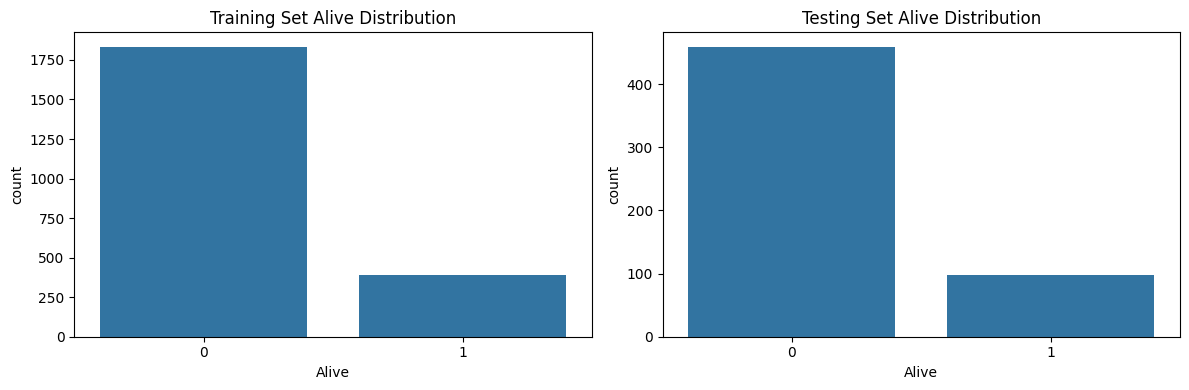

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Alive Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set Alive Distribution')
fig.tight_layout()



After this, we'll apply fit_transform to only the train features to apply the preprocessing pipeline. 

In [16]:
x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[ 0.        ,  0.        ,  1.        , ...,  0.48985738,
         0.56954381,  0.87598305],
       [ 1.        ,  0.        ,  0.        , ..., -0.95978026,
        -0.53893635, -0.4741152 ],
       [ 1.        ,  0.        ,  0.        , ..., -1.27514003,
        -0.82978254, -0.78657316],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.80210038,
        -0.76745836, -0.25026471],
       [ 0.        ,  1.        ,  0.        , ..., -0.5070864 ,
        -0.81345954, -0.10103105],
       [ 0.        ,  0.        ,  0.        , ...,  0.97306992,
         0.79954973,  0.85499706]], shape=(2226, 26))

In [17]:
x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[ 0.        ,  0.        ,  1.        , ...,  0.93746479,
         0.45379889,  1.71075882],
       [ 0.        ,  1.        ,  0.        , ..., -0.72071722,
        -1.53909113, -1.70995642],
       [ 0.        ,  0.        ,  0.        , ...,  0.84082228,
         1.13788102,  0.54020732],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  1.67499973,
         0.45083107,  2.27504858],
       [ 0.        ,  1.        ,  0.        , ..., -0.63933405,
        -1.21856675, -0.63967128],
       [ 1.        ,  0.        ,  0.        , ..., -1.10220081,
        -0.2243476 , -0.44846566]], shape=(557, 26))

## Building Classification model

For this classification model we'll use a model that can work with the bimodal distributions we discussed earlier. In this case we'll use Random Forest Classifier. We could also use Logistic regression but by trial and error we got better results with Random Forest (plus we're working with trees 𖠰𖠰𖠰). 

In [18]:
classification_model = make_pipeline(
    preprocessing_pipeline,
    RandomForestClassifier()
)

classification_model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('randomforestclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passth

By applying fit to the data we call fit transform on the data and then fit it on our Random Forest Classifier

In [19]:
classification_model.fit(x_train, y_train)



,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pipeline', ...), ('randomforestclassifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passth

Calling `predict` on the test data after training the model will internally call `transform` on the test data and then use the model to predict on the test data.

In [20]:
y_test_pred = classification_model.predict(x_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

We can evaluate the model's performance both by seeing the individual predicted and actual labels for each register. Or using an accuracy score and a confusion matrix to analyse the model generally.

In [21]:
x_test['Alive_Predicted'] = y_test_pred
x_test['Alive_Actual'] = y_test.values
x_test

,Light_ISF,AMF,Phenolics,Lignin,NSC,Species,Soil,Sterile,Conspecific,Myco,SoilMyco,Alive_Predicted,Alive_Actual
258,0.100,10.91,3.77,18.81,21.58,Quercus alba,Sterile,Sterile,Sterilized,EMF,Sterile,0,1
485,0.061,34.64,0.51,5.38,6.91,Prunus serotina,Populus grandidentata,Non-Sterile,Heterospecific,AMF,EMF,0,0
1791,0.032,12.68,3.58,23.42,16.56,Quercus rubra,Acer rubrum,Non-Sterile,Heterospecific,EMF,AMF,0,1
1220,0.065,32.61,0.71,8.13,11.57,Prunus serotina,Quercus rubra,Non-Sterile,Heterospecific,AMF,EMF,0,1
300,0.086,5.00,3.40,25.05,14.59,Quercus rubra,Sterile,Sterile,Sterilized,EMF,Sterile,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0.103,11.00,5.36,24.01,16.74,Quercus alba,Acer saccharum,Non-Sterile,Heterospecific,EMF,AMF,0,0
294,0.098,14.56,0.05,14.23,12.65,Acer saccharum,Quercus alba,Non-Sterile,Heterospecific,AMF,EMF,0,0
242,0.118,22.62,5.22,18.79,24.00,Quercus alba,Acer saccharum,Non-Sterile,Heterospecific,EMF,AMF,0,0
1588,0.073,31.46,0.67,7.54,11.50,Prunus serotina,Quercus rubra,Non-Sterile,Heterospecific,AMF,EMF,0,0


Accuracy: 85.28%
Total Test Samples: 557


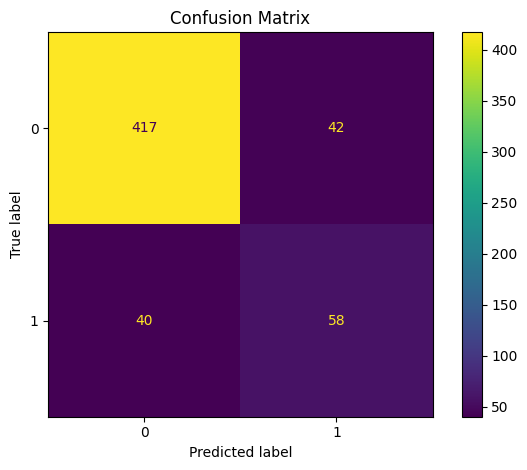

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy_score = classification_model.score(x_test, y_test)
print(f'Accuracy: {accuracy_score:.2%}')
print(f'Total Test Samples: {len(y_test)}')
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.tight_layout()

As we can see, our model performs somewhat well with an 85.10% Accuracy score. The confusion matrix shows a very similar amount of False negatives and False positives showing that the errors are quite balanced.

What's preoccupying is that we have very little predicted 'Alive' trees. If we remember there was a proportion of around 1/4 alive trees to dead ones; here we have a proportion of around 1/8. This is most likely because our target is very unbalanced. To fix this, we could apply either shrinkage of the dead tree registers or artificially add alive tree registers through different methods that are our of scope for this notebook.